##### Data Preparation

##### Exploring the content of variables

    2.1 Countries
    2.2 Customers and products
        2.2.1 Cancelling orders
        2.2.2 StockCode
        2.2.3 Basket price
##### Insight on product categories

    3.1 Product description
    3.2 Defining product categories
        3.2.1 Data encoding
        3.2.2 Clusters of products
        3.2.3 Characterizing the content of clusters
##### Customer categories

    4.1 Formating data
        4.1.1 Grouping products
        4.1.2 Time spliting of the dataset
        4.1.3 Grouping orders
    4.2 Creating customer categories
        4.2.1 Data enconding
        4.2.2 Creating categories
##### Classifying customers

    5.1 Support Vector Machine Classifier (SVC)
        5.1.1 Confusion matrix
        5.1.2 Leraning curves
    5.2 Logistic regression
    5.3 k-Nearest Neighbors
    5.4 Decision Tree
    5.5 Random Forest
    5.6 AdaBoost
    5.7 Gradient Boosting Classifier
    5.8 Let's vote !
##### Testing the predictions

##### Conclusion

--------------------------------

#### 1. Data preparation
At the first step, I load all the modules that will be used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

In [2]:
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

In [3]:
%matplotlib inline

matplotlibernel cannot support '%', specified tags, eg.%matplotlib inline, solve the issue later

In [4]:
## we can see that the read_csv function's default codec is utf-8, if uat-8 codec cannot decode, we can change other
## codec
df_initial = pd.read_csv('./data/data.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str},date_parser=['InvoiceDate'])
print('Dataframe dimensions:', df_initial.shape)

df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate'])
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})

tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)
# show first lines
display(df_initial[:5])

Dataframe dimensions: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0,0,0.268311,0,0,0,24.9267,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


While looking at the number of null values in the dataframe, it is interesting to note that ~25% of the entries are not assigned to a particular customer. with the data available, it is impossible to impute values for the users and these entries are thus useless for the current exerise, So i delete th

In [5]:
df_initial.dropna(axis=0, subset=['CustomerID'],inplace=True)
print('Dataframe dimensions:', df_initial.shape)
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})

tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

Dataframe dimensions: (406829, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0


Ok, therefore, by removing these entries we end up the with a dataframe filled at 100% for all variables! Finally, i check for duplicate entries and delete them. 

In [6]:
print('Entries duplicates:{}'.format(df_initial.duplicated().sum()))

Entries duplicates:5225


In [7]:
df_initial.drop_duplicates(inplace=True)
print(df_initial.shape)

(401604, 8)


In [8]:
df_initial.dropna(axis=0, subset=['CustomerID'],inplace=True)
print('Dataframe dimensions:', df_initial.shape)
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})

tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

Dataframe dimensions: (401604, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0


Ok, therefore, by removing these entries we end up the with a dataframe filled at 100% for all variables! Finally, i check for duplicate entries and delete them. 

In [9]:
print('Entries duplicates:{}'.format(df_initial.duplicated().sum()))
df_initial.drop_duplicates(inplace=True)
print(df_initial.shape)

Entries duplicates:0
(401604, 8)


### 2. Explore the content of variables
This dataframe contains 8 variables that correspond to:

**InvoiceNo:** Invoice number, nominal, a 6-digit integral number uniquely assigned to each transaction. if this code starts with letter 'c', it indicates a cancellation.

__StockCode__: Product code, nominal, a 5-digital integral number uniquely assigned to each distict product.

**Quanatity:** The quantities of each product per transaction. numberic.

**InvoiceDate:** Invice Date and time, Numberic, the day and time when each transaction was genearated.

**UnitPrice:** Unit price, Numberic, product price per unit in sterling.

**CustomerID:** Customer number. Norminal, a 5-digit integral uniquely assigned to each customer.

**Country:** Country name. Norminal, the name of the country where each customer residers.



#### 2.1 Country

Here, i quickly loot at the countries from which orders were made: 

In [10]:
temp = df_initial[['CustomerID','InvoiceNo','Country']].groupby(['CustomerID','InvoiceNo','Country']).count()
temp = temp.reset_index(drop=False)
countries = temp['Country'].value_counts()
display(countries[:10])
print('Nb. of country: {}'.format(len(countries)))


United Kingdom    19857
Germany             603
France              458
EIRE                319
Belgium             119
Spain               105
Netherlands         101
Switzerland          71
Portugal             70
Australia            69
Name: Country, dtype: int64

Nb. of country: 37


**Takeaway:**

We see that the dataset is largely dominated by orders made from UK.

#### 2.2 Customers and products

The dataframe contains ~400,000 entries. what are the number of users and products in there entries? 

In [11]:
pd.DataFrame([{
    'products':len(df_initial['StockCode'].value_counts()),
    'transactions':len(df_initial['InvoiceNo'].value_counts()),
    'customers':len(df_initial['CustomerID'].value_counts())
}],columns=['products','transactions','customers'] ,index=['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


It can be seen that the data contains 4372 customers and that they bought 3684 different products. The total number of transactions carried out is of the order of ~22,000

Now i will determine the number of products purchased in every transaction

In [12]:
df_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [13]:
temp = df_initial.groupby(by=['CustomerID','InvoiceNo'],as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns={'InvoiceDate':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17


***TakeAway***
   * The existence of entries with the prefix C for the invoiceNo variable: this indicates transctions that have been canceled.
   * The existence of users who only came once and only purchased one product.
   * The existence of frequenct users that buy a large number of items at each order
---------------------------

#### 2.2.1 Calcelling orders

First of all, i count the number of transactions corresponding to calceled orders: 

In [14]:
nb_products_per_basket['order_cancelled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
display(nb_products_per_basket[:5])

n1 = nb_products_per_basket['order_cancelled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders cancelled:{}/{} ({:.2f}%)'.format(n1,n2,n1/n2*100))

,CustomerID,InvoiceNo,Number of products,order_cancelled
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0


Number of orders cancelled:3654/22190 (16.47%)


We note that the number of cancelations is quite large(~16% of the total number of transactions). Now, let's look at the first lines of the dataframe.

In [15]:
display(df_initial.sort_values('CustomerID')[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland


On these few lines, we see that when an order is cancelled, we have another transactions in the dataframe, mostly identical except for the ***quantity*** and ***invoiceDate*** variable. I decided to check if this is true for all the entries. To do this, i decide to locate the entries that indicate a negative quantity and check if there is s an order indicating the same quantity, with same description(***CustomerID,Description and UnitPrice***).

In [16]:
df_check = df_initial[df_initial['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]

In [17]:
for index,col in df_check.iterrows():
    if df_initial[(df_initial['CustomerID'] == col[0]) 
                  & (df_initial['Quantity'] == -col[1])
                  & (df_initial['Description'] == col[2])
                 ].shape[0] == 0:
        print(df_check.loc[index])
        print(15*'-' + '>' + ' HYPOTHESIS NOT FULFILLED')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


We see that the initial hypothesis is not fulfilled because of the existence of a 'Discount' entry. I check again the hypothesis but this time discarding the 'Discount' entries: 

In [18]:
df_check = df_initial[(df_initial['Quantity'] < 0) & (df_initial['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if df_initial[(df_initial['CustomerID'] == col[0]) & (df_initial['Quantity'] == -col[1]) 
                & (df_initial['Description'] == col[2])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


Once more, we find that the initial hypothesis is not verified. hence, calcellations do not necessarily correspond to orders that would have been made beforehand.

at this point, i decide to create a new variable in the dataframe that indicate if part of the command has been cancelled. 

For the calcellations without counterparts, a few of them are probably due to the fact that the buy orders were performed before December 2010. below, i make a cesus of the cancel orders and check for the existence of couterparts: 

i don't know what he said, moreover, the approach cancelation has no effectiveness.



#### 2.2.3 Stock Code

Above, it has been seen that some values of the stockcode variable indicate a particular transaction(i.e. D for discount). I check the contents of this variable by looking for the set of codes that would contains only letters: 

In [19]:
list_special_codes = df_initial[df_initial['StockCode'].str.contains('^[a-zA-Z]+',regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [20]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code,
            df_initial[df_initial['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


#### 2.2.3 Basket priece
I create a new variable that indicates the total price of every purchase

In [21]:
df_initial['TotalPrice'] = df_initial['UnitPrice'] * df_initial['Quantity']
df_initial.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.6
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347,Iceland,17.0
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347,Iceland,13.2
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,15.0


Each entry of the dataframe indicates prizes for a single kind of product. Hence, orders are split on several lines. I collect all the purchases made during a single order to recover the total order prize.



In [22]:
temp = df_initial.groupby(by=['CustomerID','InvoiceNo'],as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice':'Basket Price'})
df_initial['InvoiceDate_int'] = df_initial['InvoiceDate'].astype('int64')
temp = df_initial.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_initial.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
# selection des entrées significatives:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
0,12346,541431,77183.60,2011-01-18 10:01:00.000000000
2,12347,537626,711.79,2010-12-07 14:57:00.000001024
3,12347,542237,475.39,2011-01-26 14:29:59.999999744
4,12347,549222,636.25,2011-04-07 10:42:59.999999232
5,12347,556201,382.52,2011-06-09 13:01:00.000000256
6,12347,562032,584.91,2011-08-02 08:48:00.000000000


In order to have a global view of the type of order performed in this dataset, i determine how the purchases are divided according to the total prizes.

It can be seen that the vast majority of orders concern relatively large purchases given that ~65% of purchases give prizes in excess of 200

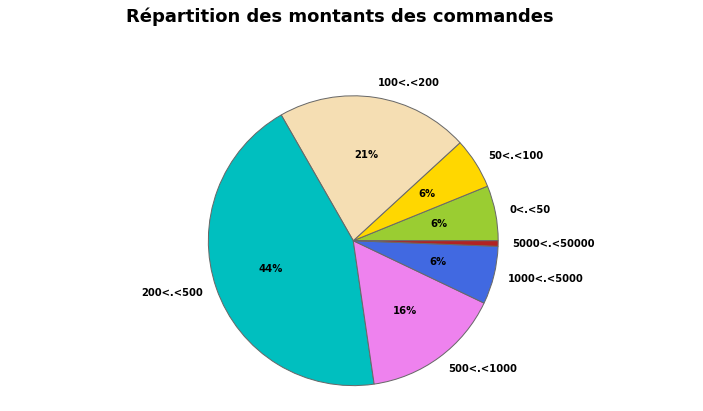

In [23]:
#____________________
# Décompte des achats
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)
#____________________________________________
# Représentation du nombre d'achats / montant        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Répartition des montants des commandes", ha='center', fontsize = 18);

### 3.Insight on product categories
In the dataframe, products are uniquely identified through the ***StockCode variable***. A short description of the products is given in the ***Description*** variable. In this section, i intent to use the content of this latter variable in order to group the products into different categories. 

#### 3.1 Products Description
As a first step, i extract from the description variable the information that will prove useful. To do this, i use the following function: 

In [35]:
is_noun = lambda pos:pos[:2] == 'NN'

def keyword_inventory(dataframe,column='Description'):
    stemmer = nltk.stem.SnowballStemmer('english')
    keywords_roots = dict()  # collect the words/root
    keywords_select = dict() # association: root <-> keyword
    category_keys = []
    count_keywords = dict()
    icount = 0
    ## after the loop, we can get entire word stem roots within the description
    for s in dataframe[column]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines) ## split the scentence wiht whitespace
        nouns = [word for (word,pos)in nltk.pos_tag(tokenized) if is_noun(pos)]
        
        for t in nouns:
            t = t.lower();
            racine = stemmer.stem(t)
            if racine in keywords_roots:
                ## add the noun stem root one more times
                keywords_roots[racine].add(t)
                count_keywords[racine] +=1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    ## 
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  ## when there is more than 1 stems
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k
                    min_length = len(k)
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
    print("Nb of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [42]:
df_produits = pd.DataFrame(df_initial['Description'].unique()).rename(columns = {0:'Description'})
keywords, keywords_roots, keywords_select, count_keywords = keyword_inventory(df_produits)

Nb of keywords in variable 'Description': 1484


In [44]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key= lambda x:x[1],reverse=True)

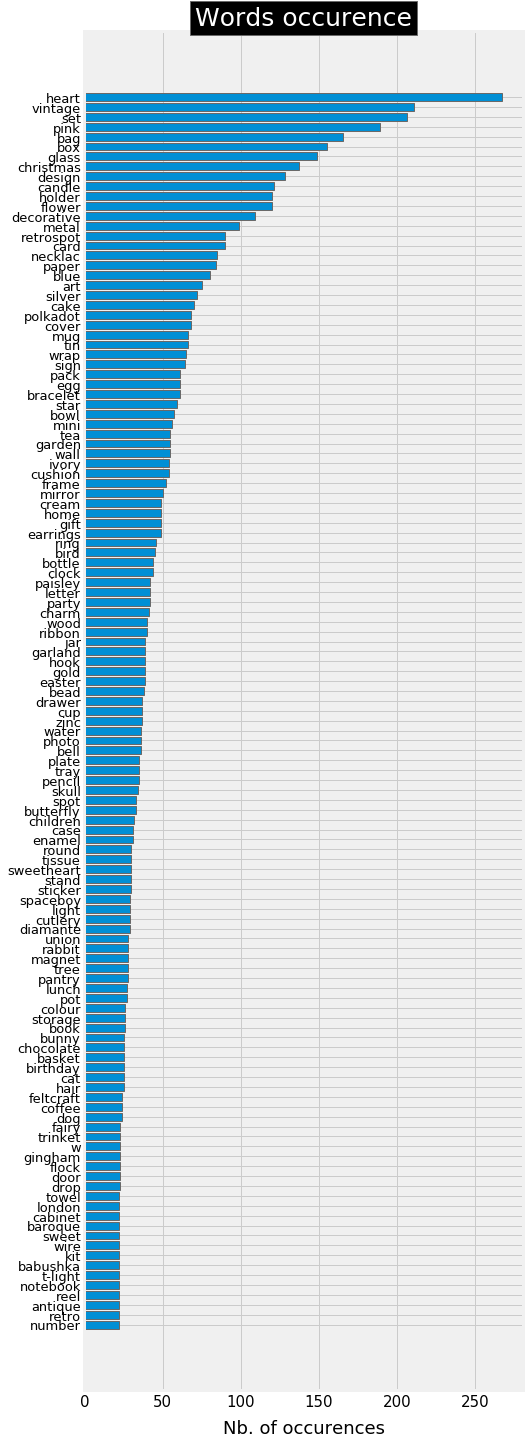

In [46]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

#### 3.2 Defining product categories

The list that was obtained contains more than 1400 keywords and the most frequent ones appear in more than 200 products. however, while examining the content of the list, i note that some names are useless. others do not carry information, like colors. Therefore, i discard these words from the analysis that follows and also, i decide to consider the words that appear more than 13times.

In [50]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink','blue','tag','green','orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word,v])
list_products.sort(key = lambda x:x[1],reverse=True)
print('most conserves: ', len(list_products))

most conserves:  193


#### 3.2.1 Data encoding
Now I will use these keywords to create groups of product. Firstly, i define the X matrix as: 
Where the ai,j coefficient is 1 if the description of the product i contains the word j, and 0 otherwise.


In [54]:
list_products[:4]

[['heart', 267], ['vintage', 211], ['set', 206], ['bag', 165]]

In [55]:
liste_products = df_initial['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:,key] = list(map(lambda x:int(key.upper() in x),liste_products))

In [73]:
X

,heart,vintage,set,bag,box,glass,christmas,design,candle,holder,...,lace,jewel,wallet,point,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3894,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


The X matrix indicates the words contained in the description of the products using the one-hot-encoding principle. In practice, i have found that intrducing the price range results in more balanced groups in terms of element numbers. Hencem i add 6 extra columns to this matrix, where i indicate the price rage of the products.

In [60]:
threshold = [0,1,2,3,5,10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold) - 1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:,col] = 0
    
for i, prod in enumerate(liste_products):
    prix = df_initial[ df_initial['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

and to choose the appropriate ranges, i check the number of products in the different groups:

In [64]:
print("{:<8} {:<20} \n".format('gamme', 'nb. produits') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

gamme    nb. produits         
--------------------
0<.<1       965                 
1<.<2       1013                
2<.<3       674                 
3<.<5       611                 
5<.<10      476                 
.>10        157                 


#### 3.2.2 Creating clusters of products

In this section, i will group the products into different classes. In the case of matrics with binary encoding, the most suitable metric for the caluculation of distances is the hamming's metric. Note that the kmeans methods of sklearn uses a euclidean distance that can be used, but it is not to the best choice in the case of categorical variabes. However, in order to use the Hamming's metric, we need to user the kmodes package which is not available  on the current platform. Hence, i use the kmeans method even if this is not the best choice.

In order to define (approximately) the number of clusters that best represents the data, i use the silhousette score: 

In [76]:
matrix = X.values
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++',n_clusters=n_clusters,n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix,clusters)
    print('For n_clusters =',n_clusters,
          'The average silhouette_score is :',silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.10062159302826501
For n_clusters = 4 The average silhouette_score is : 0.12601189170579502
For n_clusters = 5 The average silhouette_score is : 0.1453335202356209
For n_clusters = 6 The average silhouette_score is : 0.14568985353881356
For n_clusters = 7 The average silhouette_score is : 0.13836871696351272
For n_clusters = 8 The average silhouette_score is : 0.14810474485745698
For n_clusters = 9 The average silhouette_score is : 0.12974002186502476


In practice, the score obtained above can be considered equivalent since, depending on the run, scores of 0.1+/x0.05 will be obtained for all clusters with n_clusters > 3 (we obtain slightly lower scores for the first cluster). On the other hand, i found that beyond 5 clusters, some clusters contained very few elements. i therefore choose to seperate the dataset into 5 clusters. In order to ensure a good classification at every run of the notebook, i iterate until we obtain the best possible  silhouette score, which is, in the present case, around 0.15:

In [77]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is :", 
          silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.1457099185455421


--------

#### 3.2.3 Characterizing the content of clusters

i check the number of elements in every class:


In [80]:
pd.Series(clusters).value_counts()

0    1120
1    1013
4     674
3     611
2     478
dtype: int64

***a / Silhouette intra-cluster score***

In order to have an insight on the quality of the classification, we can represent the silhouette scores of each element of the different clusters. This is the purpose of the next figure which is taken from the sklearn documentation:

In [81]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

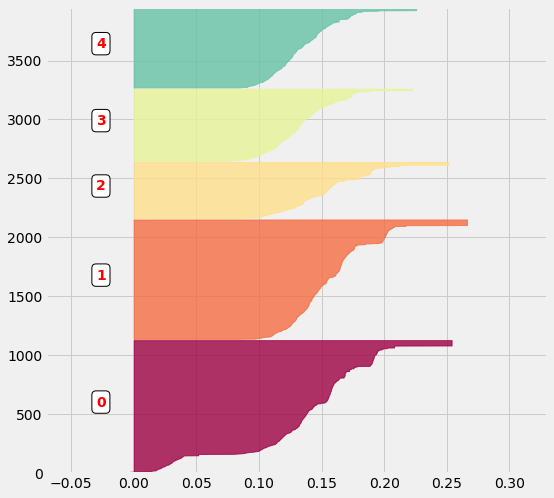

In [82]:
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

***b/ Word Cloud***

Now we can have a look at the type of objects that each cluster represents. In order to obtain a global view of their contents, i determine which keyboards are the most frequent in each of them.




In [108]:
liste = pd.DataFrame(liste_products)
liste_words = [word for (word,occurence) in list_products]
occurence = [dict() for _ in range(n_clusters)]
for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art','set','heart','pink','blue','tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

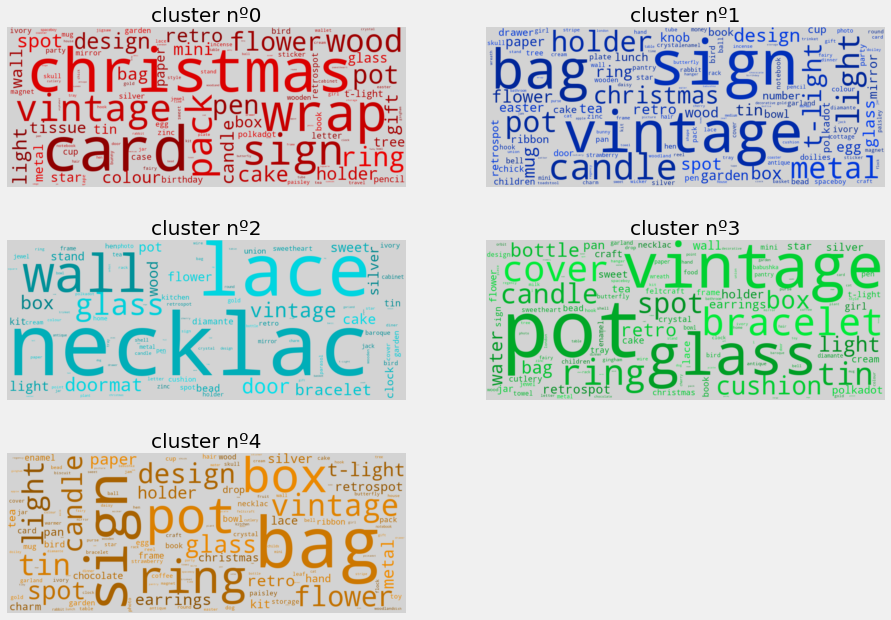

In [113]:
#________________________________________________________________________
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))
#________________________________________________________________________
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)   

From this representation, we can see that for example, one of the clusters contains objects that could be associated with gifts(Chrismas, packages,cards...). Another cluster would rather contain luxury items and jewelry(necklace, bracelet, lace,silver,...). Nevertheless, it can also be observed that many words appear in variour clusters and it is difficult to clearly distinguish them.

***c / Principal Component Analysis***

In order to ensure that these clusters are truly distinct. i look at their compositon. Given the large number of variables of the initial matri, i first perform a PCA:

In [114]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)


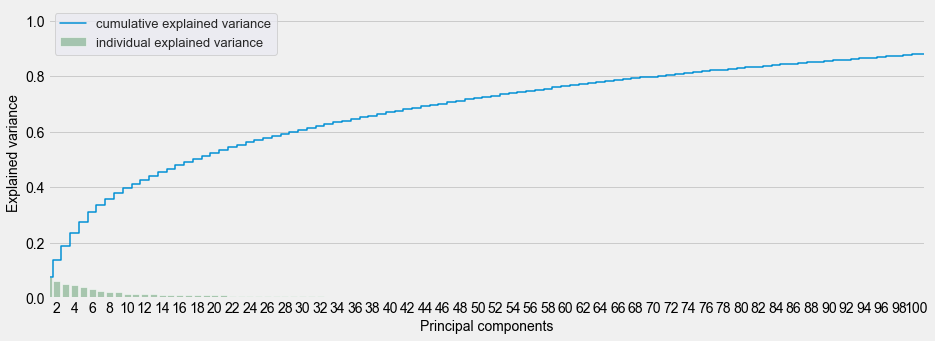

In [115]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

We see that the number of components required to explaiin the data is extremely important. we need more than 100 components to explain 90% of the variance of the data. In practice. i decide to keep only a limited number of components sice this decomposition is only performed to visualize the data:

In [116]:
pca = PCA(n_components=50)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)

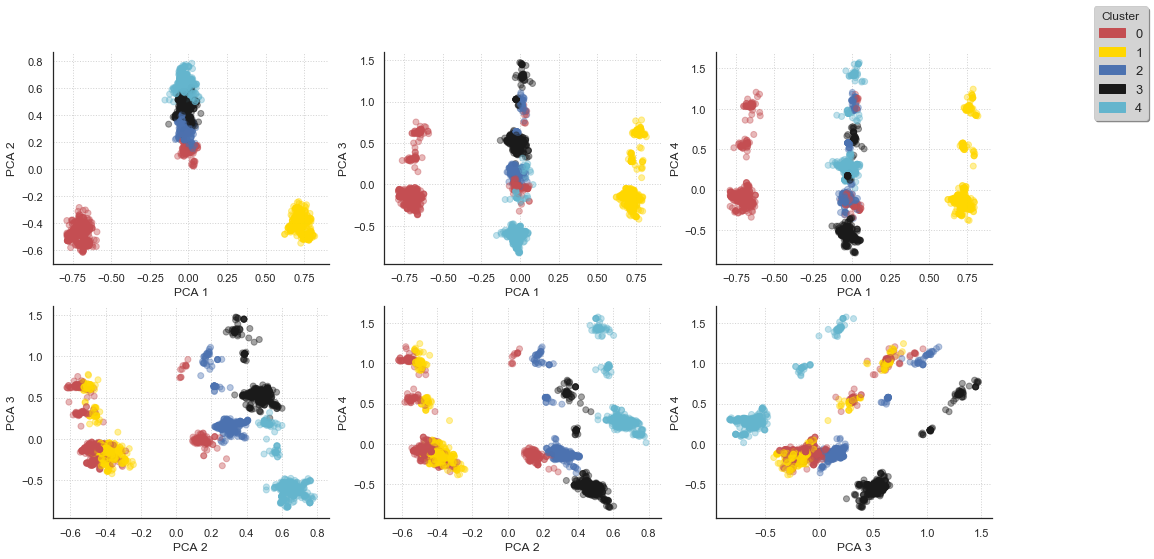

In [117]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (15,8))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

In [118]:
mat

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,cluster
0,0.043365,0.500443,0.220124,1.554022,-0.386151,-0.165115,0.700374,1.037815,0.728590,0.226114,...,0.027034,-0.016967,-0.070442,-0.147432,0.090920,-0.078520,-0.013780,-0.038525,0.068695,4
1,-0.021680,0.427582,0.508846,-0.492577,-0.339849,-0.175817,-0.253471,0.001106,0.150648,-0.089377,...,0.019563,-0.020841,-0.004572,-0.029343,-0.003641,0.024221,0.060922,0.027549,0.052912,3
2,0.019322,0.328605,1.304197,0.624583,-0.532696,-0.010651,-0.166425,-0.120362,-0.024927,-0.014939,...,-0.072838,-0.222111,-0.316805,-0.246319,0.197619,-0.111168,-0.143522,0.006695,-0.140529,3
3,-0.039102,0.473110,0.577554,-0.540340,-0.342407,-0.153111,-0.190476,0.066871,-0.050779,-0.044569,...,-0.094956,-0.241037,-0.192690,0.717934,0.717833,0.110933,-0.053369,-0.354531,-0.112801,3
4,0.012333,0.331585,1.284404,0.610461,-0.520796,-0.010051,-0.146206,-0.107979,-0.005020,0.002132,...,0.006297,-0.086176,-0.032880,-0.048948,0.011547,-0.047416,0.029830,-0.004605,0.022657,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,-0.725250,-0.433439,-0.126232,-0.095179,-0.049380,-0.110489,-0.101345,0.094116,-0.200789,-0.220783,...,-0.167784,-0.035373,-0.107227,0.127212,-0.011222,0.009345,-0.069677,0.065796,0.202929,0
3892,-0.725250,-0.433439,-0.126232,-0.095179,-0.049380,-0.110489,-0.101345,0.094116,-0.200789,-0.220783,...,-0.167784,-0.035373,-0.107227,0.127212,-0.011222,0.009345,-0.069677,0.065796,0.202929,0
3893,-0.698981,-0.439064,-0.125065,-0.067263,-0.024000,-0.078830,-0.051864,0.033757,-0.093145,-0.055784,...,0.385848,0.087494,0.152941,0.012515,0.065202,0.024096,0.085550,-0.032677,-0.157453,0
3894,0.049534,0.512619,0.248778,1.572235,-0.384543,-0.165006,0.687988,1.033941,0.718602,0.242120,...,-0.055278,-0.066617,-0.211146,-0.114846,0.116203,-0.044158,-0.091125,0.038481,-0.170241,4


## 4. Customer categories

### 4.1 Formatting data
In the previous section, the different products were grouped in five clusters. In order to prepare the rest of analysis, a first step consists in introducing this information into the dataframe. To do this, i create the categorial variable ***categ_product*** where i indicate the cluster of each product.

In [123]:
corresp = dict()
for key,val in zip(liste_products,clusters):
    corresp[key] = val
df_initial['categ_product'] = df_initial.loc[:,'Description'].map(corresp)

#### 4.1.1 Grouping products

In a second step, i decide to create the categ_N variable that contains the amount spent in each product category:

In [127]:
for i in range(5):
    col = 'categ_{}'.format(i)
    df_temp = df_initial[df_initial['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * df_temp['Quantity']
    price_temp.apply(lambda x:x if x>0 else 0)
    df_initial.loc[:, col] = price_temp
    df_initial[col].fillna(0, inplace = True)
#__________________________________________________________________________________________________
df_initial[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,4,0.0,0.0,0.0,0.00,15.3
1,536365,WHITE METAL LANTERN,3,0.0,0.0,0.0,20.34,0.0
2,536365,CREAM CUPID HEARTS COAT HANGER,3,0.0,0.0,0.0,22.00,0.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3,0.0,0.0,0.0,20.34,0.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,3,0.0,0.0,0.0,20.34,0.0


Up to now, the information related to a single order was split over serveral lines of the dataframe. i decide to collect the information related to a particular order and put it in a single entry. I create a new dataframe that contains, for each other, the amount of the basket, as well as the way it is distributed over the 5 categories of products:


In [131]:
basket_price

,CustomerID,InvoiceNo,Basket Price
0,12346,541431,77183.60
1,12346,C541433,-77183.60
2,12347,537626,711.79
3,12347,542237,475.39
4,12347,549222,636.25
...,...,...,...
22185,18283,579673,220.31
22186,18283,580872,208.00
22187,18287,554065,765.28
22188,18287,570715,1001.32


In [134]:
temp = df_initial.groupby(['CustomerID','InvoiceNo'],as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice':'Basket Price'})

for i in range(5):
    col = 'categ_{}'.format(i)
    temp = df_initial.groupby(by=['CustomerID','InvoiceNo'],as_index=False)[col].sum()
    basket_price.loc[:,col] = temp
    
df_initial['InvoiceDate_int'] = df_initial['InvoiceDate'].astype('int64')
temp = df_initial.groupby(by=['CustomerID','InvoiceNo'],as_index=False)['InvoiceDate_int'].mean()
df_initial.drop('InvoiceDate_int',axis=1,inplace=True)
basket_price.loc[:,'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]  

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
0,12346,541431,77183.60,0.00,77183.6,0.00,0.00,0.00,2011-01-18 10:01:00.000000000
2,12347,537626,711.79,23.40,187.2,124.44,293.35,83.40,2010-12-07 14:57:00.000001024
3,12347,542237,475.39,122.59,130.5,0.00,169.20,53.10,2011-01-26 14:29:59.999999744
4,12347,549222,636.25,119.25,330.9,0.00,115.00,71.10,2011-04-07 10:42:59.999999232
5,12347,556201,382.52,41.40,74.4,19.90,168.76,78.06,2011-06-09 13:01:00.000000256


### 4.1.2 Separation of data over time

The dataframe basket_price contains information for a period of 12 months. Later, one of the objectives will be develop a model capable of characterizing and anticipating the habits of the customers visiting the site and this, from their first visit. In order to be able to test the model in a realistic way, i split the data set by retaining the first 10 months to develop the model and the following two months to test it: 

In [135]:
print(basket_price['InvoiceDate'].min(),'-->',
      basket_price['InvoiceDate'].max())

2010-12-01 08:26:00 --> 2011-12-09 12:50:00


In [137]:
import datetime

In [140]:
set_entrainment = basket_price[basket_price['InvoiceDate'] < 
                       pd.Timestamp(2011,10,1)]
set_test = basket_price[basket_price['InvoiceDate'] >
                       pd.Timestamp(2011,10,1)]

basket_price = set_entrainment.copy(deep= True)

### 4.1.3 Customer order Combinations
In a second step, i group together the different entries that correspond to the same user. i thus determine the number of purchases made by the user, as well as the minimum, maximum, average amounts and the total amount spent during all the visits.

In [147]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]




,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,100.000000,0.000000,0.000000,0.000000
1,12347,5,382.52,711.79,558.172000,2790.86,14.554295,29.836681,8.676179,32.408290,14.524555
2,12348,4,227.44,892.80,449.310000,1797.24,58.046783,41.953217,0.000000,0.000000,0.000000
3,12350,1,334.40,334.40,334.400000,334.40,23.654306,48.444976,0.000000,0.000000,27.900718
4,12352,7,120.33,840.30,313.472857,2194.31,50.779060,15.378866,13.516777,15.526521,4.798775


Finally, i define two additional variables that give the number of days elapsed since the first purchase(firstPurchase) and the number of days since the last purchase( lastPurchase):

In [148]:
last_date = basket_price['InvoiceDate'].max().date()

In [151]:
first_registration = pd.DataFrame(
    basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min()
)
last_purchase = pd.DataFrame(
    basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max()
)

In [156]:
test = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)
transactions_per_user.loc[:,'LastPurchase'] = \
    test2.reset_index(drop=False)['InvoiceDate']

transactions_per_user.loc[:,'FirstPurchase'] = \
    test.reset_index(drop=False)['InvoiceDate']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,100.000000,0.000000,0.000000,0.000000,255,255
1,12347,5,382.52,711.79,558.172000,2790.86,14.554295,29.836681,8.676179,32.408290,14.524555,59,297
2,12348,4,227.44,892.80,449.310000,1797.24,58.046783,41.953217,0.000000,0.000000,0.000000,5,288
3,12350,1,334.40,334.40,334.400000,334.40,23.654306,48.444976,0.000000,0.000000,27.900718,240,240
4,12352,7,120.33,840.30,313.472857,2194.31,50.779060,15.378866,13.516777,15.526521,4.798775,2,226


A customer category of particular interest is that of customers who make only one purchase. One of the objectives may be, for example, to target these customers in order to retain them. in part, i find that this type of customer represent 1/3 of the customers listed:

In [157]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("nb. de clients avec achat unique: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

nb. de clients avec achat unique: 1445/3616  (39.96%)


## 4.2 Creation of customers categories

### 4.2.1 Data encoding

The dataframe transactions_per_user contains a summary of all the commands that were made.Each entry in this dataframe corresponds to a particular client. i use this information to charaterize the different types of customers and only keep a subset of variables:

In [162]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#_____________________________________________________________
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].values


In practice, the different variables i selected have quite different ranges of variation and before continuing the ananlysis, i create a matrix where these data are standardied.

In [164]:
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)


variables mean values: 
------------------------------------------------------------------------------------------
 [  3.64159292 283.80657135 598.26905227 406.80196824  21.49686275
  25.31418566  15.75149337  16.35059427  21.08686395]


In the following, i will create clusters of customers. in practise, before creating these cluster, it is interesting to define a base of smaller dimension allowing to describe the scaled_matrix. in this case, i will use this base in order to create a represntation of the different clusters and thus verify the quality of the seperation of the different groups. i therefore perform a PCA beforehand:

In [165]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

And i represent the amount of variance explained by each of the components:

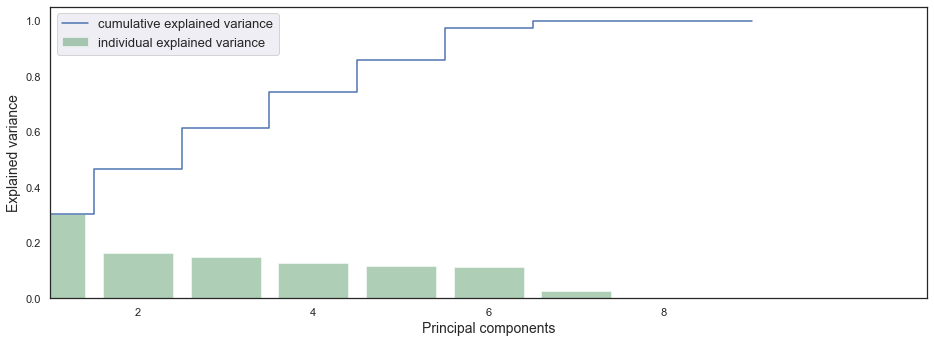

In [166]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

### 4.2.1 Creation of customer categories

at this point, i define clusters of clients from the standardized matrix that was defined eariler and using the k-means algorithm from scikit-learn. i choose the number of clusters based on the silhouette score and i find that the best score is obtained with 11 clusters.

In [167]:
n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.207


In [168]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. de clients']).T


,4,5,2,6,1,0,8,7,9,10,3
nb. de clients,1201,914,311,303,287,282,152,148,9,8,1


***a / Report via the PCA***

There is a certain disparity in the sizes of different groups that have been created. Hence I will now try to understand the content of these clusters in order to validate (or not) this particular separation. At first, I use the result of the PCA:



In [169]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)


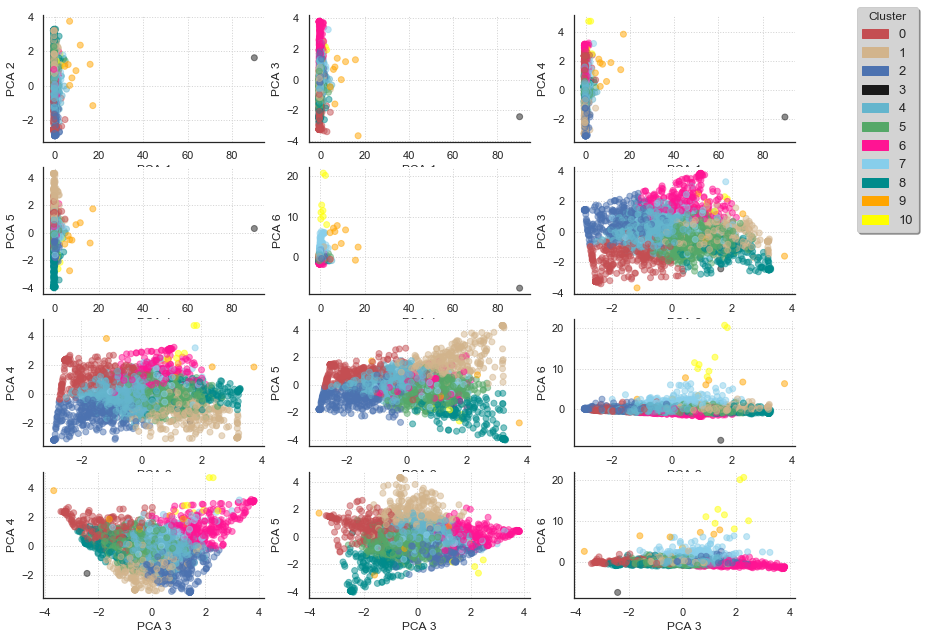

In [170]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

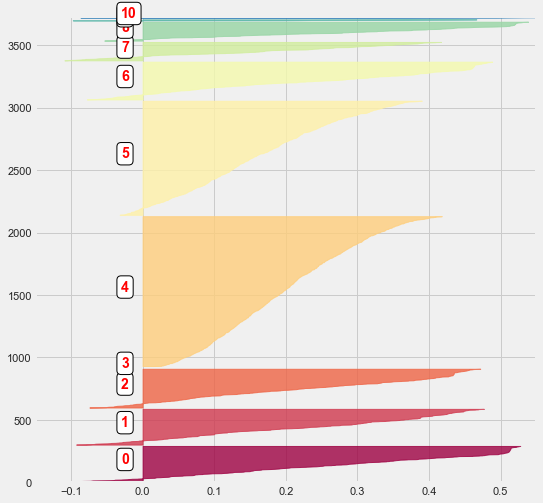

In [171]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

**c/ Customers morphotype***

At this stage, I have verified that the different clusters are indeed disjoint (at least, in a global way). It remains to understand the habits of the customers in each cluster. To do so, I start by adding to the selected_customers dataframe a variable that defines the cluster to which each client belongs:



In [174]:
selected_customers.loc[:, 'cluster'] = clusters_clients


Then, I average the contents of this dataframe by first selecting the different groups of clients. This gives access to, for example, the average baskets price, the number of visits or the total sums spent by the clients of the different clusters. I also determine the number of clients in each group (variable size ):



In [185]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster',drop=True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df,test])
merged_df.drop('CustomerID',axis=1,inplace = True)
print(print('number of customers:', merged_df['size'].sum()))
merged_df = merged_df.sort_values('sum')
    

number of customers: 3616
None


Finally, I re-organize the content of the dataframe by ordering the different clusters: first, in relation to the amount wpsent in each product category and then, according to the total amount spent:



In [186]:
merged_df.head()

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,size
cluster,,,,,,,,,,,,,
2.0,2.276527,225.930193,332.712158,275.941583,620.098235,12.813194,64.006275,6.477447,6.179535,10.523549,114.604502,174.691318,311
0.0,2.223404,240.539610,383.174362,299.839325,713.027128,67.017034,13.044581,6.492648,5.649450,7.796287,111.425532,170.578014,282
8.0,2.506579,270.859013,401.226842,329.000429,827.075329,8.428569,7.840440,68.977304,7.523327,7.230360,116.026316,183.671053,152
1.0,2.184669,254.127631,435.673624,331.851212,840.325679,9.519080,13.987220,10.100233,52.160054,14.233413,102.616725,167.229965,287
6.0,2.663366,252.686304,453.585314,345.897226,960.773762,9.120829,15.161639,7.340205,7.487682,60.889645,97.270627,188.828383,303


In [187]:
liste_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] > 45].index.values[0])
#___________________________________
liste_index_reordered = liste_index
liste_index_reordered += [ s for s in merged_df.index if s not in liste_index]
#___________________________________________________________
merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
display(merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0',
                   'categ_1', 'categ_2', 'categ_3', 'categ_4', 'size']])

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,size
0,0.0,2.223404,240.539610,383.174362,299.839325,713.027128,67.017034,13.044581,6.492648,5.649450,7.796287,282
1,2.0,2.276527,225.930193,332.712158,275.941583,620.098235,12.813194,64.006275,6.477447,6.179535,10.523549,311
2,8.0,2.506579,270.859013,401.226842,329.000429,827.075329,8.428569,7.840440,68.977304,7.523327,7.230360,152
3,1.0,2.184669,254.127631,435.673624,331.851212,840.325679,9.519080,13.987220,10.100233,52.160054,14.233413,287
4,6.0,2.663366,252.686304,453.585314,345.897226,960.773762,9.120829,15.161639,7.340205,7.487682,60.889645,303
5,5.0,2.892779,264.692004,494.433460,366.486369,1046.377487,17.634434,18.275599,27.100605,18.150430,18.838932,914
6,4.0,3.065779,297.959192,569.202290,421.431016,1240.718801,23.980693,31.145401,8.438342,14.930378,21.505187,1201
7,7.0,18.614865,80.642162,1316.698378,492.920562,9273.472838,18.813590,23.932454,15.539719,16.580263,25.133974,148
8,10.0,88.250000,21.001250,2647.717500,464.562700,38685.182500,19.887023,24.876256,16.669918,13.809111,24.757692,8
9,3.0,1.000000,77183.600000,77183.600000,77183.600000,77183.600000,0.000000,100.000000,0.000000,0.000000,0.000000,1


In [188]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

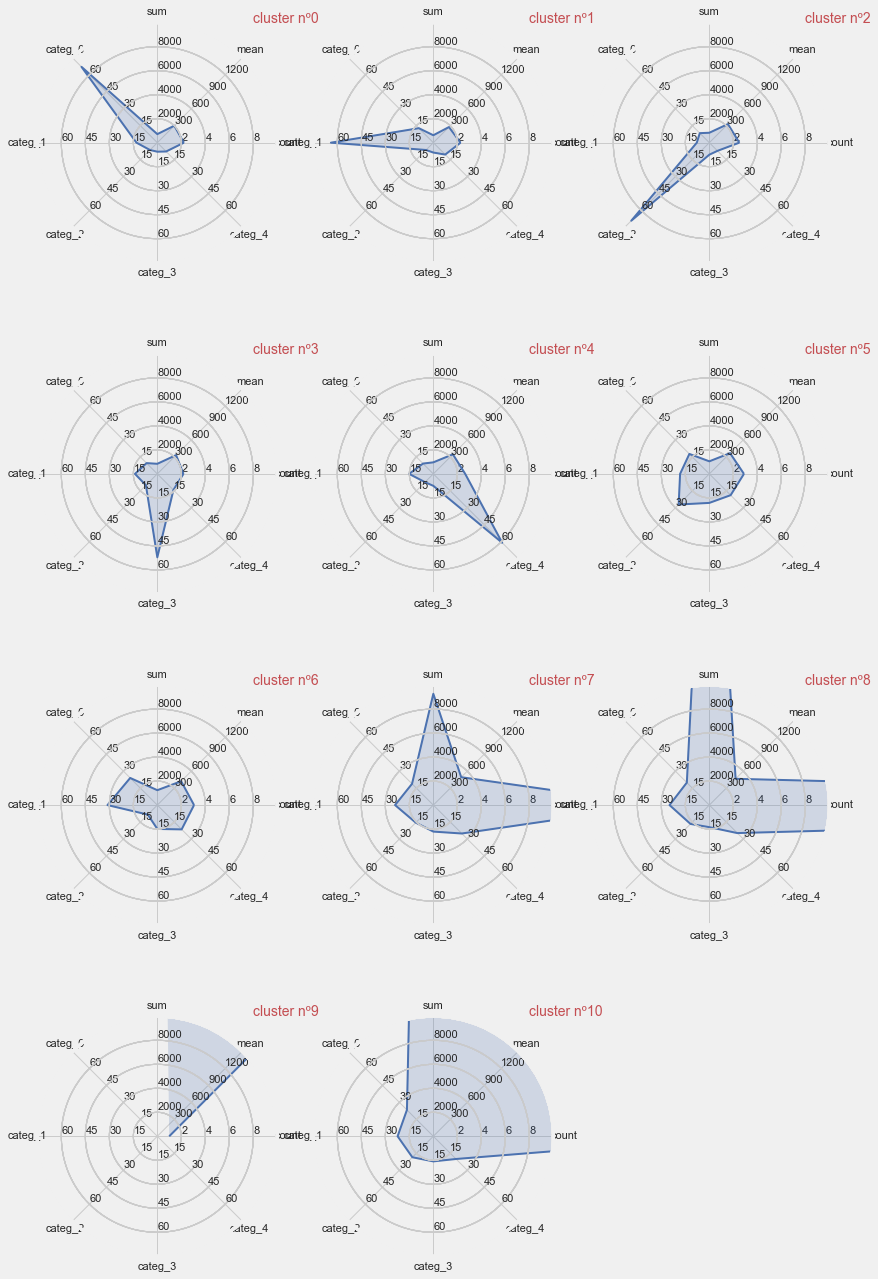

In [189]:
fig = plt.figure(figsize=(10,12))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 

It can be seen, for example, that the first 5 clusters correspond to a strong preponderance of purchases in a particular category of products. Other clusters will differ from basket averages ( mean ), the total sum spent by the clients ( sum ) or the total number of visits made ( count ).



## 5. Classification of customers¶


In this part, the objective will be to adjust a classifier that will classify consumers in the different client categories that were established in the previous section. The objective is to make this classification possible at the first visit. To fulfil this objective, i will test serveral classifiers implemented in scikit-learn. First, in order to simplify their use, i define a class that allows to interface several of the functionalities common to these different classifiers:

In [190]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))

Since the goal is to define the class to which a client belongs and this, as soon as its first visit, I only keep the variables that describe the content of the basket, and do not take into account the variables related to the frequency of visits or variations of the basket price over time:



In [191]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

In [192]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)


------------

### 5.1 Support Vector Machine Classifier (SVC)

The first classifier I use is the SVC classifier. In order to use it, I create an instance of the Class_Fit class and then callgrid_search(). When calling this method, I provide as parameters:

* the hyperparameters for which I will seek an optimal value
* the number of folds to be used for cross-validation



In [193]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [194]:
svc.grid_fit(X = X_train, Y = Y_train)
svc.grid_predict(X_test, Y_test)


Precision: 62.29 % 


### 5.1.1 Confusion matrix¶

The accuracy of the results seems to be correct. Nevertheless, let us remember that when the different classes were defined, there was an imbalance in size between the classes obtained. In particular, one class contains around 40% of the clients. It is therefore interesting to look at how the predictions and real values compare to the breasts of the different classes. This is the subject of the confusion matrices and to represent them, I use the code of the sklearn documentation:



In [196]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


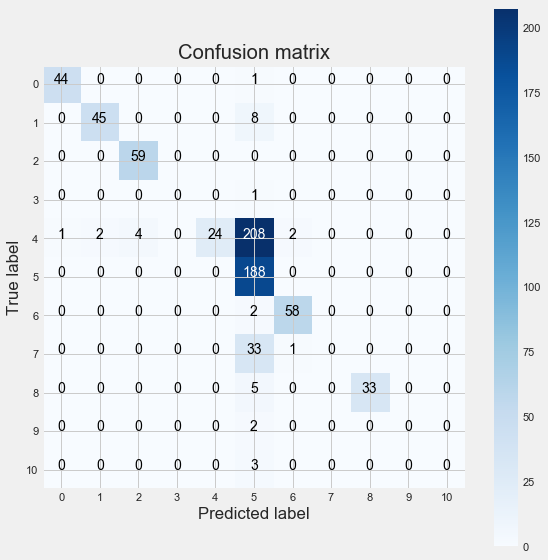

In [197]:
class_names = [i for i in range(11)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')

### 5.1.2 Learning curve
A typical way to test the quality of a fit is to draw a learning curve. In particular, this type of curves allow to detect possible drawbacks in the model, linked for example to over- or under-fitting. This also shows to which extent the mode could benefit from a larger data sample. In order to draw this curve, I use the scikit-learn documentation code again

In [198]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


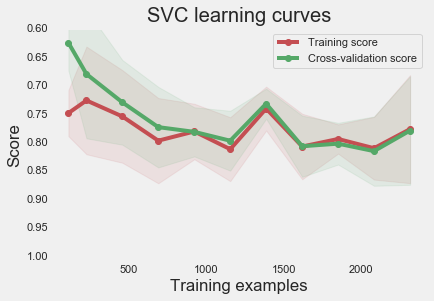

In [199]:
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

On this curve, we can see that the train and cross-validation curves converge towards the same limit when the sample size increases. This is typical of modeling with low variance and proves that the model does not suffer from overfitting. Also, we can see that the accuracy of the training curve is correct which is synonymous of a low bias. Hence the model does not underfit the data.

## 5.2 Logistic Regression¶


I now consider the logistic regression classifier. As before, I create an instance of the Class_Fit class, adjust the model on the training data and see how the predictions compare to the real values:



In [200]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 90.88 % 


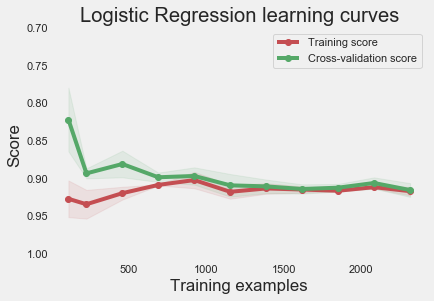

In [201]:
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.3 k-Nearest Neighbors¶


In [202]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 74.31 % 


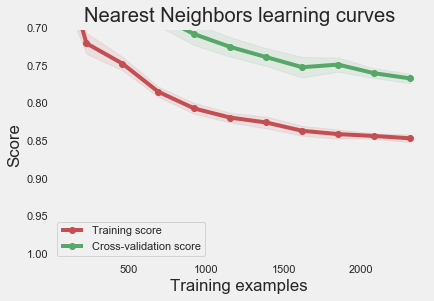

In [203]:
g = plot_learning_curve(knn.grid.best_estimator_, "Nearest Neighbors learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

##  5.4 Decision Tree¶


In [205]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 84.94 % 


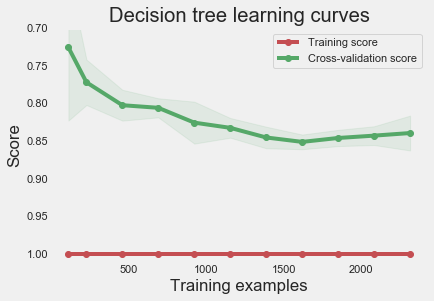

In [206]:
g = plot_learning_curve(tr.grid.best_estimator_, "Decision tree learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.5 Random Forest¶


In [207]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 91.57 % 


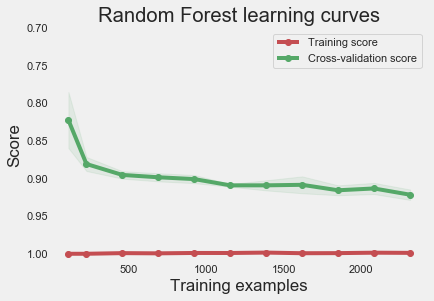

In [208]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.6 AdaBoost Classifier¶


In [209]:
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 5)
ada.grid_fit(X = X_train, Y = Y_train)
ada.grid_predict(X_test, Y_test)


Precision: 60.77 % 


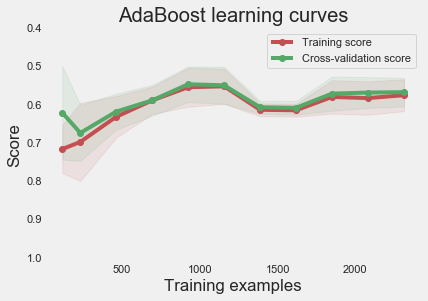

In [210]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost learning curves", X_train, Y_train,
                        ylim = [1.01, 0.4], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

 ## 5.7 Gradient Boosting Classifier¶


In [211]:
gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)


Precision: 91.44 % 


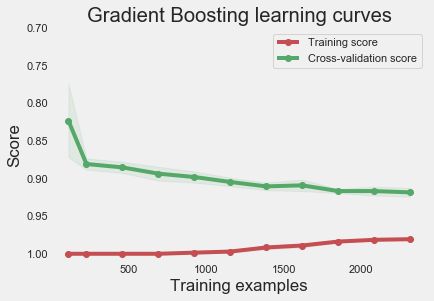

In [212]:
g = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.8 Let's vote !¶

Finally, the results of the different classifiers presented in the previous sections can be combined to improve the classification model. This can be achieved by selecting the customer category as the one indicated by the majority of classifiers. To do this, I use the VotingClassifier method of the sklearn package. As a first step, I adjust the parameters of the various classifiers using the best parameters previously found:

In [213]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)


Then, I define a classifier that merges the results of the various classifiers:



In [214]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best),
                                                ('knn', knn_best)], voting='soft') 

In [215]:
votingC = votingC.fit(X_train, Y_train)

In [216]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 90.88 % 


Note that when defining the votingC classifier, I only used a sub-sample of the whole set of classifiers defined above and only retained the Random Forest, the k-Nearest Neighbors and the Gradient Boosting classifiers. In practice, this choice has been done with respect to the performance of the classification carried out in the next section.



## 6. Testing predictions¶


In the previous section, a few classifiers were trained in order to categorize customers. Until that point, the whole analysis was based on the data of the first 10 months. In this section, I test the model the last two months of the dataset, that has been stored in the set_test dataframe:



In [217]:
basket_price = set_test.copy(deep = True)

In a first step, I regroup reformattes these data according to the same procedure as used on the training set. However, I am correcting the data to take into account the difference in time between the two datasets and weights the variables count and sum to obtain an equivalence with the training set:



In [218]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()

#_______________________
# Correcting time range
transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum']   = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('CustomerID', ascending = True)[:5]


,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,10,224.82,1294.32,759.57,7595.70,17.732401,20.017905,5.634767,24.271627,32.343299
1,12349,5,1757.55,1757.55,1757.55,8787.75,30.145373,26.506216,20.389178,10.713778,12.245455
2,12352,5,311.73,311.73,311.73,1558.65,32.335675,34.420813,17.290604,7.217785,8.735123
3,12356,5,58.35,58.35,58.35,291.75,100.000000,0.000000,0.000000,0.000000,0.000000
4,12357,5,6207.67,6207.67,6207.67,31038.35,11.657514,18.098578,26.832129,28.350089,15.061690


In [221]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#_____________________________________________________________
matrix_test = transactions_per_user[list_cols].values
scaled_test_matrix = scaler.transform(matrix_test)

Each line in this matrix contains a consumer's buying habits. At this stage, it is a question of using these habits in order to define the category to which the consumer belongs. These categories have been established in Section 4. At this stage, it is important to bear in mind that this step does not correspond to the classification stage itself. Here, we prepare the test data by defining the category to which the customers belong. However, this definition uses data obtained over a period of 2 months (via the variables count , min , max and sum ). The classifier defined in Section 5 uses a more restricted set of variables that will be defined from the first purchase of a client.



Here it is a question of using the available data over a period of two months and using this data to define the category to which the customers belong. Then, the classifier can be tested by comparing its predictions with these categories. In order to define the category to which the clients belong, I recall the instance of the kmeans method used in section 4. Thepredict method of this instance calculates the distance of the consumers from the centroids of the 11 client classes and the smallest distance will define the belonging to the different categories:



In [222]:
Y = kmeans.predict(scaled_test_matrix)


In [224]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = transactions_per_user[columns]

In [225]:
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logostic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Support Vector Machine
Precision: 52.15 % 
______________________________ 
Logostic Regression
Precision: 75.08 % 
______________________________ 
k-Nearest Neighbors
Precision: 63.36 % 
______________________________ 
Decision Tree
Precision: 71.21 % 
______________________________ 
Random Forest
Precision: 76.21 % 
______________________________ 
Gradient Boosting
Precision: 75.98 % 


Finally, as anticipated in Section 5.8, it is possible to improve the quality of the classifier by combining their respective predictions. At this level, I chose to mix Random Forest, Gradient Boosting and k-Nearest Neighbors predictions because this leads to a slight improvement in predictions:



In [226]:
predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, predictions)))

Precision: 76.33 % 
